<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

<h2 style="margin-bottom: 18px">Index</h2>

Included the Stacking method for the Auto-insurance problem to increase the efficiency of the model by 3% from Random Forest Bagging method. Created this as part of my Big Bang Data Science course curriculam. 


<details>
<summary>
Roadmap for Building Machine Learning Models
</summary>
<p>


    1. Prepare Problem  
    a) Define The Business Objective  
    b) Select the datasets  
    c) Load dataset  
    d) Load libraries  


**Data Pre-processing**  
This is the first step in building a machine learning model. Data pre-processing refers to the transformation of data
before feeding it into the model. It deals with the techniques that are used to convert unusable raw data into clean 
reliable data.  
  
Since data collection is often not performed in a controlled manner, raw data often contains outliers 
(for example, age = 120), nonsensical data combinations (for example, model: bicycle, type: 4-wheeler), missing values, 
scale problems, and so on. Because of this, raw data cannot be fed into a machine learning model because it might 
compromise the quality of the results. As such, this is the most important step in the process of data science.  
  

    2. Summarize Data  
    a) Descriptive statistics  
    b) Data visualizations  

    3. Prepare Data  
    a) Data Cleaning  
    b) Feature Selection  
    c) Data Transformation  

**Model Learning**  
After pre-processing the data and splitting it into train/test sets (more on this later), we move on to modeling. Models 
are nothing but sets of well-defined methods called algorithms that use pre-processed data to learn patterns, which can 
later be used to make predictions. There are different types of learning algorithms, including supervised, semi-supervised, 
unsupervised, and reinforcement learning. These will be discussed later.
  
    4. Modeling Strategy  
    a) Select Suitable Algorithms  
    b) Select Training/Testing Approaches  
    c) Train   
  
  
**Model Evaluation**  
In this stage, the models are evaluated with the help of specific performance metrics. With these metrics, we can go on to 
tune the hyperparameters of a model in order to improve it. This process is called hyperparameter optimization. We will 
repeat this step until we are satisfied with the performance.  
  
    4. Evaluate Algorithms  
    a) Split-out validation dataset  
    b) Test options and evaluation metric  
    c) Spot Check Algorithms  
    d) Compare Algorithms  
  
**Prediction**  
Once we are happy with the results from the evaluation step, we will then move on to predictions. Predictions are made 
by the trained model when it is exposed to a new dataset. In a business setting, these predictions can be shared with 
decision makers to make effective business choices.  
  
    5. Improve Accuracy  
    a) Algorithm Tuning  
    b) Ensembles  

**Model Deployment**  
The whole process of machine learning does not just stop with model building and prediction. It also involves making use 
of the model to build an application with the new data. Depending on the business requirements, the deployment may be a 
report, or it may be some repetitive data science steps that are to be executed. After deployment, a model needs proper 
management and maintenance at regular intervals to keep it up and running.  

    6. Finalize Model  
    a) Predictions on validation dataset  
    b) Create standalone model on entire training dataset  
    c) Save model for later use  


</p>
</details>

<a id="I"></a>

# I.  Reading Data - Exploratory Data Analysis with Pandas

### Article outline
1. Demonstration of main Pandas methods
2. First attempt on predicting Auto Insurance Fraud
3. Useful resources

### 1. Demonstration of main Pandas methods 

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [2]:
# Disply all Columns
pd.options.display.max_columns=70

In [3]:
autinsurance = pd.read_csv('autinsuranceV3.csv')
autinsurance.head()

,Unnamed: 0,age,umbrella_limit,capital_gains,witnesses,total_claim_amount,fraud_reported,insured_education_level_High School,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_exec-managerial,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_skydiving,insured_hobbies_video-games,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_wife,collision_type_Rear Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Springfield,auto_make_Mercedes,auto_model_95,auto_model_Civic,auto_model_Forrestor,auto_model_Jetta,auto_model_Malibu,auto_model_Wrangler,auto_model_X6
0,0,48,0,53300,2,71610,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,42,5000000,0,0,5070,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,29,5000000,35100,3,34650,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,41,6000000,48900,2,63400,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,44,6000000,66000,1,6500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
autinsurance = autinsurance.drop('Unnamed: 0', axis = 1)

In [5]:
autinsurance.columns

Index(['age', 'umbrella_limit', 'capital_gains', 'witnesses',
       'total_claim_amount', 'fraud_reported',
       'insured_education_level_High School', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_exec-managerial', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_skydiving', 'insured_hobbies_video-games',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_wife', 'collision_type_Rear Collision',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_city_Columbus', 'incident_city_Hillsdale',
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Springfield', 'auto_make_Mercedes', 'auto_model_95',
       'auto_model_Civic', 'auto_model_Forrestor', 'auto_model_Jetta',
       'auto_model_Malibu', 'auto_model_Wrangler', '

In [6]:
autinsurance['fraud_reported'].value_counts(normalize=True)

0    0.753
1    0.247
Name: fraud_reported, dtype: float64

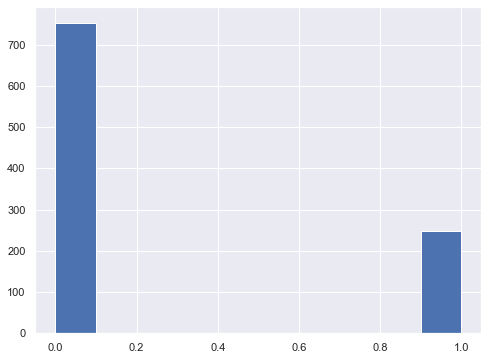

In [7]:
plt.rcParams['figure.figsize'] = 8,6
autinsurance['fraud_reported'].hist()

In [8]:
to_drop = [
'auto_model_95',
'auto_model_Forrestor',
'incident_city_Columbus',
'insured_education_level_High School',
'auto_model_X6',
'insured_relationship_wife',
'insured_relationship_other-relative',
'auto_model_Jetta']

In [9]:
autinsurance = autinsurance.drop(to_drop, axis = 1)

In [10]:
autinsurance.shape

(1000, 27)

In [11]:
autinsurance.columns

Index(['age', 'umbrella_limit', 'capital_gains', 'witnesses',
       'total_claim_amount', 'fraud_reported', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_exec-managerial', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_skydiving', 'insured_hobbies_video-games',
       'insured_relationship_own-child', 'collision_type_Rear Collision',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_city_Hillsdale', 'incident_city_Northbend',
       'incident_city_Northbrook', 'incident_city_Springfield',
       'auto_make_Mercedes', 'auto_model_Civic', 'auto_model_Malibu',
       'auto_model_Wrangler'],
      dtype='object')

In [12]:
# autinsurance = autinsurance.drop(to_drop , axis = 1)

In [13]:
 X = autinsurance.drop('fraud_reported', axis = 1)
 y = autinsurance.fraud_reported

In [14]:
# X = Bchurn.iloc[:, [3,6,7,8,8,10,11,12,13]].values
# y = Bchurn.iloc[:, 13].values

In [15]:
# Calculate Correlation
corr_matrix = autinsurance.corr()

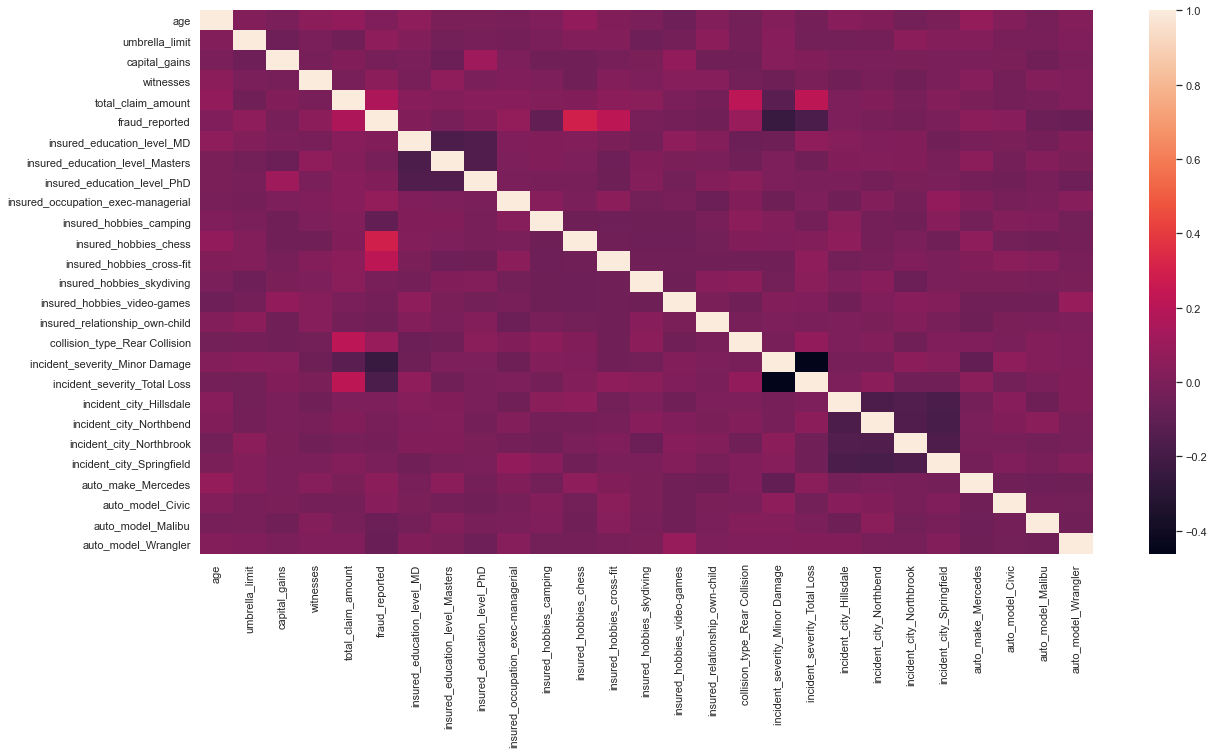

In [16]:
# Correlation Matrix Plot

import seaborn

plt.rcParams['figure.figsize'] = 20,10  # control plot size

corr_matrix = autinsurance.corr()
seaborn.heatmap(corr_matrix )
plt.show()

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

<h2 id="t1" style="margin-bottom: 18px">Data split & Scaling Data Preprocessing</h2>


In [17]:
 X = autinsurance.drop('fraud_reported', axis = 1)
 y = autinsurance.fraud_reported

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(autinsurance.drop('fraud_reported', axis = 1),
                                               autinsurance.fraud_reported,
                                               test_size = .2,
                                               random_state=12)


<h2 id="t1" style="margin-bottom: 18px">Machine Learning</h2>

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  # Class
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
# Class count
#df_train = autinsurance
count_class_0, count_class_1 = autinsurance.fraud_reported.value_counts()

# Divide by class
df_class_0 = autinsurance[autinsurance['fraud_reported'] == 0]
df_class_1 = autinsurance[autinsurance['fraud_reported'] == 1]

Random over-sampling:
1    753
0    753
Name: fraud_reported, dtype: int64


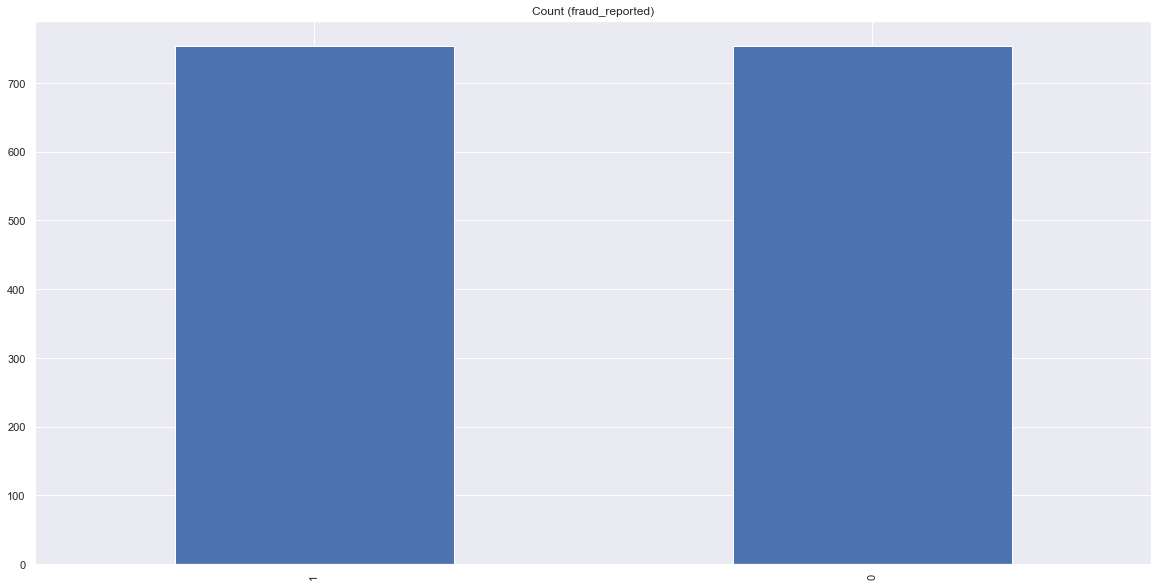

In [21]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.fraud_reported.value_counts())

df_test_over.fraud_reported.value_counts().plot(kind='bar', title='Count (fraud_reported)');

In [22]:
 X = df_test_over.drop('fraud_reported', axis = 1)
 y = df_test_over.fraud_reported

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features_over, test_features_over, \
training_target_over, test_target_over, = train_test_split(df_test_over.drop('fraud_reported', axis = 1),
                                               df_test_over.fraud_reported,
                                               test_size = .2,
                                               random_state=12)

In [24]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
#models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
#models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features_over, training_target_over,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.854665 (0.021876)
KNN    : 0.572261 (0.022213)
CART   : 0.896186 (0.015032)
GNB    : 0.591383 (0.015791)
KSVM   : 0.520781 (0.022759)
ABM    : 0.854668 (0.028067)
GBM    : 0.887050 (0.023351)
RFM    : 0.921103 (0.014098)
ExT    : 0.933562 (0.015721)


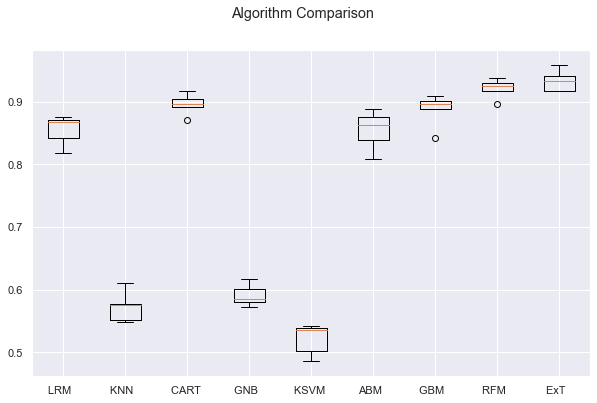

In [25]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
#Stacking Ensemble Machine Learning With Python
#https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
#Choosing the base model and the meta model. 


>LR 0.841 (0.028)
>KNN 0.583 (0.034)
>CART 0.912 (0.024)
>SVM 0.526 (0.028)
>NB 0.590 (0.027)
>ABM 0.847 (0.027)
>GBM 0.880 (0.026)
>ExT 0.934 (0.019)
>RFM 0.926 (0.024)
>STACKING 0.957 (0.017)


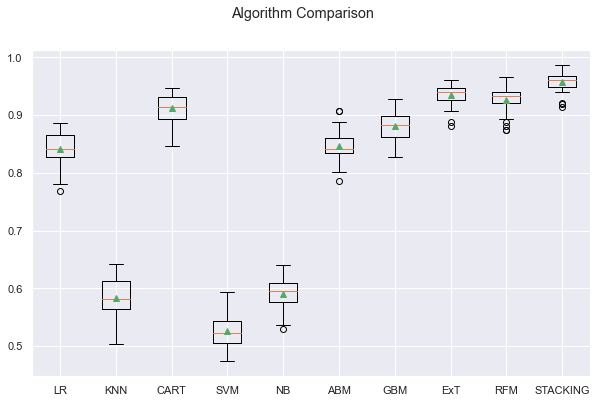

In [30]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
	level0.append(('knn', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
	level0.append(('cart', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
	level0.append(('svm', SVC(kernel = 'rbf', random_state = 45)))
	level0.append(('bayes', GaussianNB()))
	level0.append(('ABM',AdaBoostClassifier()))
	level0.append(('GBM',GradientBoostingClassifier()))
	level0.append(('RFM',RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
	level0.append(('ExT',ExtraTreesClassifier()))
    
	# define meta learner model
#	level1 = LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)
#	level1 = RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42) 
	level1 = GradientBoostingClassifier() 
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models= dict()
	models['LR'] = LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)
	models['KNN'] = KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)
	models['CART'] = DecisionTreeClassifier(criterion = 'entropy', random_state = 45)
	models['SVM'] = SVC(kernel = 'rbf', random_state = 45)
	models['NB'] = GaussianNB()
	models['ABM'] = AdaBoostClassifier()
	models['GBM'] = GradientBoostingClassifier()
	models['ExT'] = ExtraTreesClassifier()
	models['RFM'] = RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)    
	models['STACKING'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()